In [3]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
%matplotlib inline

import math

from scipy.sparse import csgraph

print('bla')

bla


In [46]:
from queue import PriorityQueue

pq = PriorityQueue()

class Bla():
    def __init__(self, name, cost):
        self.name = name
        self.cost = cost
        
    def __lt__(self, other):
        return self.cost < other.cost
    
    def __repr__(self):
        return f"<{self.name}, cost={self.cost}>"


In [50]:
pq.put(Bla('AA', 1))
pq.put(Bla('B', 2))
pq.put(Bla('C', 3))
pq.put(Bla('D', 4))
pq.put(Bla('E', 3))
pq.put(Bla('F', 2))
pq.put(Bla('G', 1))

In [80]:
bla_list = [Bla('A', 5), Bla('B', 1), Bla('C', 3), Bla('D', 2)]

In [86]:
bla_list.sort()
print(bla_list)

[<B, cost=1>, <D, cost=2>, <C, cost=3>, <A, cost=5>]


In [87]:
list.reverse(bla_list)
print(bla_list)

[<A, cost=5>, <C, cost=3>, <D, cost=2>, <B, cost=1>]


In [92]:
ret = (bla_list.append(5))

In [93]:
print(bla_list, ret)

[<A, cost=5>, <C, cost=3>, <D, cost=2>, <B, cost=1>, 5, 5, 5] None


# Line crossing

In [247]:
class Vertex:
    def __init__(self, x, y, neighbors=None):
        self.x = x
        self.y = y

        if not neighbors:
            self.neighbors = []
        else:
            self.neighbors = neighbors

    def add_neighbor(self, neighbor):
        self.neighbors.append(neighbor)

    def __repr__(self):
        return "<V({:0.2f},{:0.2f})".format(self.x, self.y)

class Edge:
    def __init__(self, p1=None, p2=None):
        if p1:
            self.p1 = p1
        else:
            self.p1 = Vertex(0,0)

        if p2:
            self.p2 = p2
        else:
            self.p2 = Vertex(0,0)

    def intersect(self, other):
        # more info https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
        den = (self.p1.x-self.p2.x)*(other.p1.y-other.p2.y)-(self.p1.y-self.p2.y)*(other.p1.x-other.p2.x)
        if den == 0:
            # lines are parallel
            print("PARALLEL")
            return False

        t = ((self.p1.x-other.p1.x)*(other.p1.y-other.p2.y)-(self.p1.y-other.p1.y)*(other.p1.x-other.p2.x))/ den
        u = -((self.p1.x-self.p2.x)*(self.p1.y-other.p1.y)-(self.p1.y-self.p2.y)*(self.p1.x-other.p1.x))/ den

        #print("t,u {:.10f} {:.10f}".format(t,u))
        x1 = self.p1.x+t*(self.p2.x-self.p1.x)
        y1 = self.p1.y+t*(self.p2.y-self.p1.y)
        
        if u < 1 and u > 0:
            return (x1, y1)

        return False
    


PARALLEL
they do not


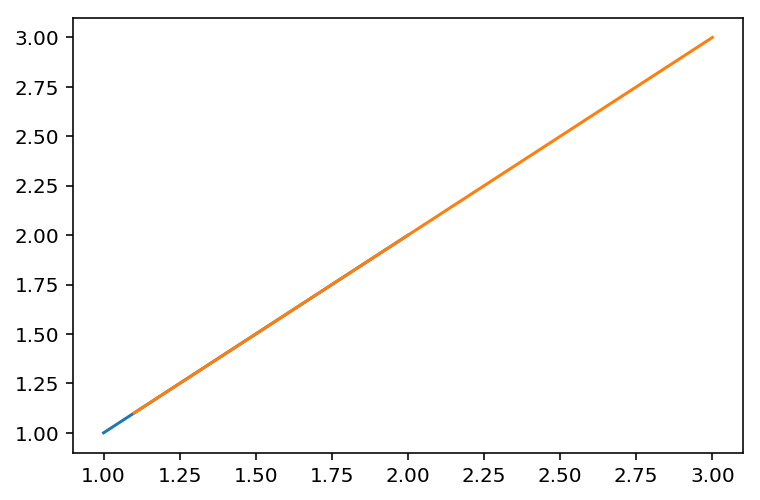

In [249]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "retina"
%matplotlib inline
V=Vertex

#<V(7.00,4.00)> <V(7.00,-4.00)>

a = Edge(Vertex(1,1), Vertex(2,2))
b = Edge(Vertex(1.1,1.1), Vertex(3,3))

res = a.intersect(b)
if res != False:
    print("they intersect")
    x1, y1 = res
    plt.scatter(x1, y1)
else:
    print("they do not")
    
x1, y1 = (a.p1.x, a.p1.y)
x2, y2 = (a.p2.x, a.p2.y)
x3, y3 = (b.p1.x, b.p1.y)
x4, y4 = (b.p2.x, b.p2.y)

plt.plot([x1,x2], [y1,y2])
plt.plot([x3,x4], [y3,y4])


In [236]:
#Ax = b

A = np.array([[x2-x1, y1-y2],
              [x4-x3, y3-y4]])
b = np.array([-x1*y2+x2*y1,
              -x3*y4+x4*y3])
try:
    x = np.linalg.solve(A, b)
    print(f"Schnittpunkt: {x[1]}, {x[0]}")
except np.linalg.LinAlgError as e:
    print("Kein Schnittpunkt", e)

y_, x_ = x

rx0 = (x_ - x1) / (x2 - x1)
ry0 = (y_ - y1) / (y2 - y1)
rx1 = (x_ - x3) / (x4 - x3)
ry1 = (y_ - y3) / (y4-0.001 - y3+0.001)

if ((rx0 > 0 and rx0 < 1) or (ry0 > 0 and ry0 <1)) and ((rx1 > 0 and rx1 < 1) or (ry1 > 0 and ry1 <1)):
    # intersection
    print("intersection")
else:
    # no intersection
    print("no intersection")

#if x1 < x2:
#    if x_ >= x1 and x_ <= x2 and y_ >= y1 and y_ <= y2:
#        #print("crossing line1 ")
#        if x_ == x1 and y_ == y1:
#            print("crossing line1 at start point")
#        else:
#            if x_ == x2 and y_ == y2:
#                print("crossing line1 at end point")
#            else:
#                print("crossing line1")
#                
#else:
#    if x_ >= x2 and x_ <= x1 and y_ >= y1 and y_ <= y2:
#        #print("crossing line1 ")
#        if x_ == x1 and y_ == y1:
#            print("crossing line1 at start point")
#        else:
#            if x_ == x2 and y_ == y2:
#                print("crossing line1 at end point")
#            else:
#                print("crossing line1")
#        
#else:
#    print("not crossing line1")
#    
#if x_ >= x3 and x_ <= x4 and y_ >= y3 and y_ <= y4:
#    #print("crossing line2 ")
#    if x_ == x3 and y_ == y3:
#        print("crossing line1 at start point")
#    else:
#        if x_ == x4 and y_ == y4:
#            print("crossing line1 at end point")
#        else:
#            print("crossing line1")
#else:
#    print("not crossing line2")


Schnittpunkt: 900.0, -300.0
no intersection


In [127]:
try:
    y_ = ((y3*x4-y4*x3)*(y1-y2)-(y1*x2-y2*x1)*(y3-y4))/((x4-x3)*(y1-y2)-(x2-x1)*(y3-y4))
    x_ = ((y1*x2-y2*x1)-(x2-x1)*y_)/(y1-y2)
except ZeroDivisionError as e:
    print("Division through zero")

x_, y_

Division through zero


(2.672467371037906, 3000.0)

In [130]:
import math
-math.inf

-inf

In [161]:
xlist = [[(1,2), (3,4), (5,6)], [(8,9), (10,11)]]
from functools import reduce
temp = list(reduce(lambda x,y:x+y, xlist))

x1, y1 = zip(*temp)

In [164]:
print(max(x1), min(x1))

10 1


In [167]:
xmin = 200.0; xmax = 3400.0; ymin =  200.0; ymax = 2200.0

In [180]:
width = 1000
xscale = width/(xmax-xmin)


height = 1000*(ymax+ymin)/(xmax+xmin)
yscale = height/(ymax-ymin)

print(height,yscale)

666.6666666666666 0.3333333333333333


In [178]:
(ymax+ymin)/(xmax+xmin)

0.6666666666666666

In [184]:
polygons = [[(2700.0, 1700.0), (2300.0, 200.0), (3400.0, 800.0)],
[(300.0, 2200.0), (200.0, 800.0), (900.0, 1400.0)],
[(0.0, 0.0), (-1000.0, 0.0), (-1000.0, -1000.0), (0.0, -1000.0)],
[(1900.0, 3100.0), (2500.0, 2600.0), (1700.0, 2000.0)]]

for

In [4]:
math.pow(2,32)

4294967296.0

In [ ]:
# c-space
from random import randint

class Vertex:
    def __init__(self, x=None, y=None):
        if x == None:
            self.x = randint(0, 100)
        else:
            self.x = x
        
        if y == None:
            self.y = randint(0, 100)
        else:
            self.y = y
            
    def __sub__(self, other):
        self.x -= other.x
        self.y -= other.y
        
    def __repr__(self):
        return "({},{})".format(self.x, self.y)

    def tup(self):
        return (self.x, self.y)

# create random points
S = []
for i in range(5):
    S.append(Vertex())
    
S.sort(key=lambda v: v.x)

start_p = S[0];
next_p = None
P = [S[0]]
it = 0
while (next_p != P[0]):
    if it > 100:
        print("BREAK!")
        break
    else:
        it += 1
        
    for check_p in S:
        if next_p == None:
            next_p = check_p
        else:
            position = (next_p.x - start_p.x) * (check_p.y - start_p.y) - (next_p.y - start_p.y) * (check_p.x - start_p.x)

            print(position)

            if position < 0:
                next_p = check_p
                

    P.append(next_p)
    start_p = next_p

print(P)
#print(points)
#print(P)
#x, y = zip(*S.tub())
#
#plt.scatter(x,y);
#x, y = zip(*P.tub())
#plt.scatter(x,y);

OUTER: (1,1)
INNER (1,1)
INNER (2,1)UPDATE
INNER (2,2)
INNER (3,1)
APPEND (2,1)
OUTER: (2,1)
INNER (1,1)
INNER (2,1)
INNER (2,2)UPDATE
INNER (3,1)UPDATE
APPEND (3,1)
OUTER: (3,1)
INNER (1,1)
INNER (2,1)
INNER (2,2)UPDATE
INNER (3,1)
APPEND (2,2)
OUTER: (2,2)
INNER (1,1)
INNER (2,1)
INNER (2,2)
INNER (3,1)
APPEND (1,1)
! (1,1) (2,1) (3,1)
! (2,1) (3,1) (2,2)
! (3,1) (2,2) (1,1)
(1,1) (2,1)
(2,1) (3,1)
(3,1) (2,2)
(2,2) (1,1)


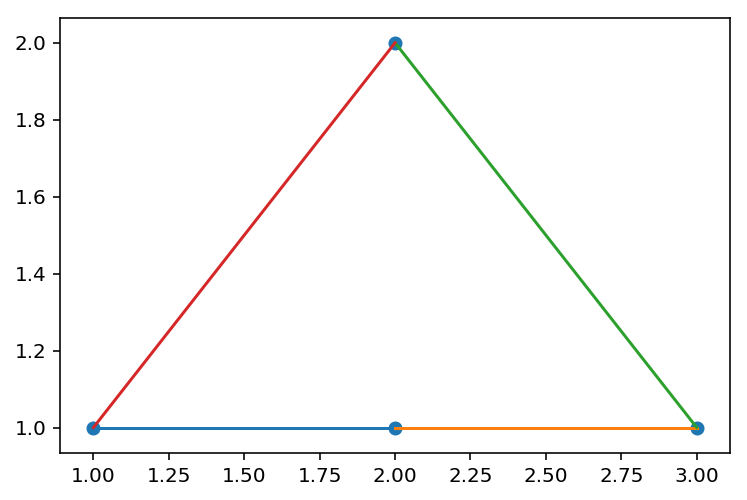

In [22]:
#S = [Vertex(1,6), Vertex(2,1), Vertex(5,4) , Vertex(3,3)]


S = []
for i in range(500):
    S.append(Vertex())

S = [Vertex(1,1), Vertex(2,1), Vertex(3,1), Vertex(2,2)]
    
S.sort(key=lambda v: v.x)
P = [S[0]]
next_p = None

start_p = S[0]
while (next_p != P[0]):
    #print("Current Point:", start_p)
    next_p = None
    print("OUTER:", start_p)
    for check_p in S:
        print("INNER", check_p, end='')
        if next_p == None:
            next_p = check_p
            print("")
        else:
            #print("Check:", start_p, next_p, check_p)
            position = (next_p.x - start_p.x) * (check_p.y - start_p.y) - (next_p.y - start_p.y) * (check_p.x - start_p.x)
            
            #print("Pos. ", position)
            if next_p == start_p or position < 0:
                #print("save", check_p)
                next_p = check_p
                print("UPDATE")
            else:
                print("")
                
    print("APPEND", next_p)
    P.append(next_p)
    
    start_p = next_p

#position = (next_p.x - start_p.x) * (check_p.y - start_p.y) - (next_p.y - start_p.y) * (check_p.x - start_p.x)
#print(position)

#plt.plot([start_p.x,next_p.x], [start_p.y,next_p.y])
#plt.plot([start_p.x,check_p.x], [start_p.y,check_p.y])

for i in range(len(P)-2):
    print("!", P[i], P[i+1], P[i+2])
    
    if angle < 0.001:
        P.append(P[i+1])
    

x = []
y = []
for v in S:
    x.append(v.x)
    y.append(v.y)
plt.scatter(x,y);

old = None
for p in P:
    if old:
        print(old, p)
        plt.plot([old.x, p.x], [old.y, p.y])
    old = p
    

In [328]:
print(check_p, next_p)

(3,3) (1,6)


In [198]:
def func1():
    print("print func1")
    return True

def func2():
    print("print func2")
    return True

func1() or func2()

print func1


True